#DAT405 Introduction to Data Science and AI 
##2022-2023, Reading Period 1
## Assignment 4: Spam classification using Naïve Bayes 
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.



*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

###1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 
2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)


In [431]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay

import re
import matplotlib.pyplot as plt
import pandas as pd
import os

In [432]:
# pre-processing code here

# Method for retrieving data from files
def get_datasets(paths, email_class):
    rows = []
    for path in paths:
        for file in os.listdir(path):
            with open(os.path.join(path, file), encoding='latin-1') as email:
                if email is not None:
                    content = email.read()
                    rows.append({'Class': email_class, 'Email': file, 'Content': content})
    return pd.DataFrame(rows)

# retrieving data into dataframes with classes, file name and content
df_easy_ham = get_datasets(['./Data/easy_ham'], 'Ham')
df_hard_ham = get_datasets(['./Data/hard_ham'], 'Ham')
df_spam = get_datasets(['./Data/spam'], 'Spam')

# Merging dataframes
frames = [df_easy_ham, df_hard_ham, df_spam]
df_merged = pd.concat(frames)

df_merged.head()

,Class,Email,Content
0,Ham,0001.ea7e79d3153e7469e7a9c3e0af6a357e,From exmh-workers-admin@redhat.com Thu Aug 22...
1,Ham,0002.b3120c4bcbf3101e661161ee7efcb8bf,From Steve_Burt@cursor-system.com Thu Aug 22 ...
2,Ham,0003.acfc5ad94bbd27118a0d8685d18c89dd,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...
3,Ham,0004.e8d5727378ddde5c3be181df593f1712,From irregulars-admin@tb.tf Thu Aug 22 14:23:...
4,Ham,0005.8c3b9e9c0f3f183ddaf7592a11b99957,From exmh-users-admin@redhat.com Thu Aug 22 1...


In [433]:
# Collecting columns of content and classes

x = df_merged.Content
y = df_merged.Class

# Splitting our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Count Vectorizer creates a Bag of words
cv = CountVectorizer()
x_train_vector = cv.fit_transform(x_train)
x_test_vector = cv.transform(x_test)

###2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





In [434]:
# Accuracy of training and test sets

# Multinomial
print('Multinomial - ')
multinomial_nb = MultinomialNB().fit(x_train_vector, y_train)
print('    training accuracy:',multinomial_nb.score(x_train_vector,y_train))
print('    test accuracy:    ',multinomial_nb.score(x_test_vector,y_test))

# Bernoulli
print('\nBernoulli - ')
bernoulli_nb = BernoulliNB().fit(x_train_vector, y_train)
print('    training accuracy:  ',bernoulli_nb.score(x_train_vector,y_train))
print('    test accuracy is:   ',bernoulli_nb.score(x_test_vector,y_test))

Multinomial - 
    training accuracy: 0.9977281332828474
    test accuracy:     0.9712556732223904

Bernoulli - 
    training accuracy:   0.9182127981825067
    test accuracy is:    0.8608169440242057


In [435]:
# Method for making confusion matrices
def make_confusion_matrix(x_test_vector, x_train_vector,  y_test, y_train):
    
    # fitting models with training vector
    multinomial_nb = MultinomialNB().fit(x_train_vector, y_train)
    bernoulli_nb = BernoulliNB().fit(x_train_vector, y_train)
    
    # predicting using test data
    y_pred_multinomial = multinomial_nb.predict(x_test_vector)
    y_pred_bernoulli = bernoulli_nb.predict(x_test_vector)
    
    # plotting confusion matrices
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    fig.suptitle("Confusion matrices", fontsize=20)
    
    ConfusionMatrixDisplay.from_estimator(multinomial_nb, x_test_vector, y_test, cmap = "Greens_r", ax=ax1, colorbar=False, normalize='true')
    ax1.set_title("Multinomial")
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("Actual")
    
    ConfusionMatrixDisplay.from_estimator(bernoulli_nb, x_test_vector, y_test, cmap = "Greens_r", ax=ax2, colorbar=False, normalize='true')
    ax2.set_title("Bernoulli")
    ax2.set_xlabel("Predicted")
    ax2.set_ylabel("Actual")

    plt.show()

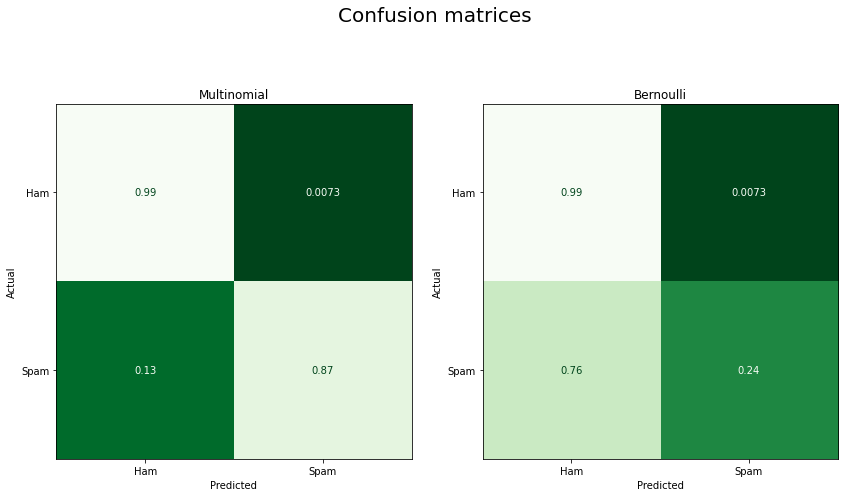

In [436]:
make_confusion_matrix(x_test_vector, x_train_vector,  y_test, y_train)

Your discussion here:

- By comparing the two types of graphs above, we can check to see which model is the better performing one. Both models seem to label "ham" mails with approximative equivalent efficiency. It's the "spam" that can help use decide which one to go with. We know that Multinomial naive Bayes will evaluate the class of an email based on the counts it finds multiple words. On the other hand Bernoulli naive Bayes only focuses if a word is present or not. The methods models somewhat different things. If you have discrete multiple features to worry about, like in our case, then Multinomial naive Bayes is better.

### 3.Run your program on 
-	Spam versus easy-ham 
-	Spam versus hard-ham.

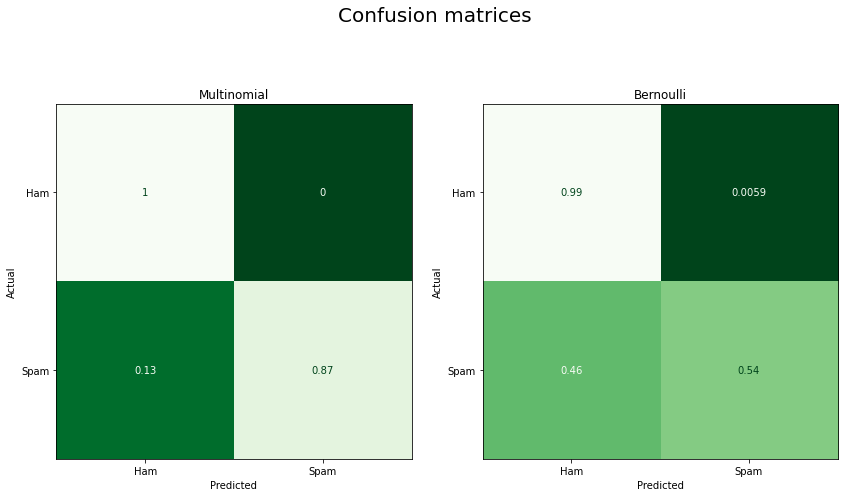

In [437]:
#Code to report results here

#Spam versus easy-ham
df_spam_vs_easy_ham = pd.concat([df_spam, df_easy_ham])
x = df_spam_vs_easy_ham.Content
y = df_spam_vs_easy_ham.Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Count Vectorizer creates a Bag of words
cv = CountVectorizer()
x_train_vector = cv.fit_transform(x_train)
x_test_vector = cv.transform(x_test)

make_confusion_matrix(x_test_vector, x_train_vector,  y_test, y_train)

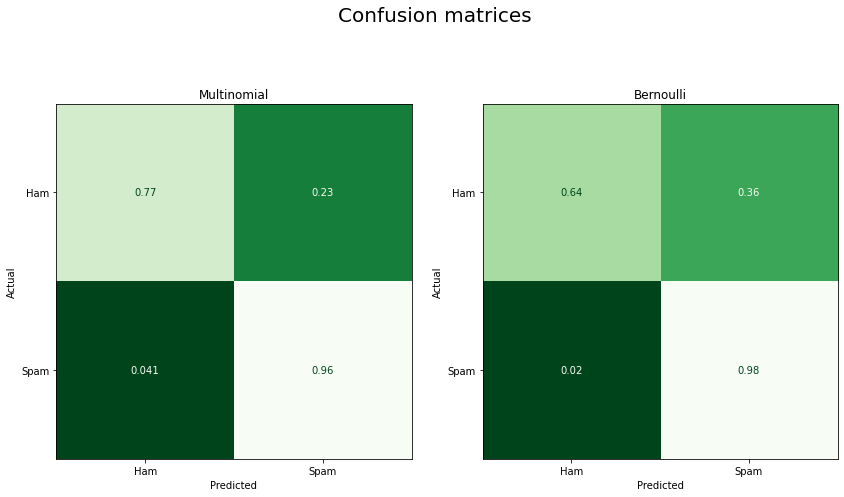

In [438]:
#Code to report results here

#Spam versus hard-ham
df_spam_vs_easy_ham = pd.concat([df_spam, df_hard_ham])
x = df_spam_vs_easy_ham.Content
y = df_spam_vs_easy_ham.Class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Count Vectorizer creates a Bag of words
cv = CountVectorizer()
x_train_vector = cv.fit_transform(x_train)
x_test_vector = cv.transform(x_test)

make_confusion_matrix(x_test_vector, x_train_vector,  y_test, y_train)

###4.	To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.


###5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
-	Does the result improve from 3 and 4? 
- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
- How does this alter the predictions? Discuss why or why not.